<a href="https://colab.research.google.com/github/AfsanehHabibi/reddit-conversation-quality/blob/main/Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install anytree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 1.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = "/content/drive/MyDrive/University/RedditData/"

In [4]:
import pickle

with open(f"{base_path}conversations_with_numbers_sites.pkl", 'rb') as file:
    conversations = pickle.load(file)

print("Len loaded data:", len(conversations))

Len loaded data: 18184


site_ref_count, has_reasoning, readability_score, politnes_score

1.   List item
2.   List item



In [6]:
import pandas as pd

data = []

for id in conversations:
    comments = conversations[id]['comments']
    for comment in comments:
        if not(comment['body'] == '[deleted]' or comment['body'] == '[removed]'):
            has_relatedness = False
            for pair in conversations[id]['pairs']:
                if pair['reply_id'] == comment['id']:
                    data.append([comment['id'], id, comment['readability_score'], comment['evidence'], comment['has_reasoning'], comment['politness_score'], pair['relatedness_score']])
                    has_relatedness = True
                    break
            if not has_relatedness:
              data.append([comment['id'], id, comment['readability_score'], comment['evidence'], comment['has_reasoning'], comment['politness_score'], None])


df = pd.DataFrame(data, columns=['id', 'conversation_id', 'readability', 'evidence', 'has_reasoning', 'politensess', 'relatedness'])


In [16]:
# Assuming your dataframe is named 'df'
count_values_greater_than_08 = df[df['evidence'] > 0.4]['evidence'].count()
print(count_values_greater_than_08)


79418


In [19]:
# Assuming your dataframe is named 'df'
df['new_readability'] = df['readability'].apply(lambda x: -10 if x < -10 else x)

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Assuming your dataframe is named 'df'
scaler = MinMaxScaler()
df['norm_readability'] = scaler.fit_transform(df[['new_readability']])
df['norm_politeness'] = scaler.fit_transform(df[['politensess']])

In [24]:
df.head(20)

,id,conversation_id,readability,evidence,has_reasoning,politensess,relatedness,new_readability,norm_readability,norm_politeness
0,xyt38s,xyt38s,-0.5,0.5,False,0.095238,NaN,-0.5,0.95,0.117647
1,iromk5a,xyt38s,-0.5,0.5,False,0.095238,0.887727,-0.5,0.95,0.117647
2,irpc624,xyt38s,-4.5,0.5,False,0.000000,0.031587,-4.5,0.55,0.000000
3,irp3pvs,xyt38s,-5.5,0.0,False,0.047619,0.000000,-5.5,0.45,0.058824
4,xyt38b,xyt38b,-2.5,0.5,True,0.380952,NaN,-2.5,0.75,0.470588
5,iril0dg,xyt38b,0.0,0.5,True,0.238095,0.262232,0.0,1.00,0.294118
6,iritie3,xyt38b,-4.5,0.0,False,0.095238,0.130049,-4.5,0.55,0.117647
7,irj304y,xyt38b,-4.5,0.0,False,0.047619,0.022900,-4.5,0.55,0.058824
8,irjtg1m,xyt38b,0.0,0.0,False,0.095238,0.042969,0.0,1.00,0.117647
9,irs6cuu,xyt38b,-4.5,0.0,False,0.095238,0.000000,-4.5,0.55,0.117647


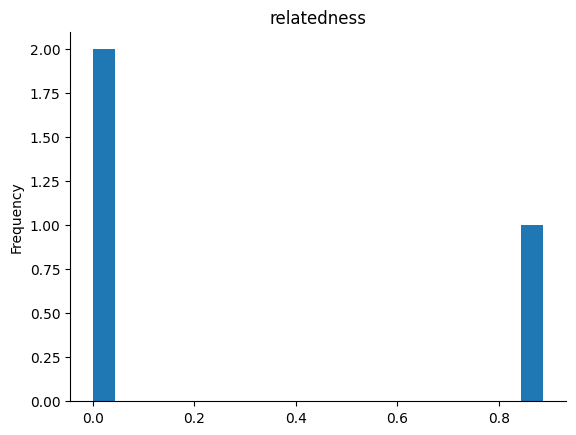

In [14]:
from matplotlib import pyplot as plt
_df_3['relatedness'].plot(kind='hist', bins=20, title='relatedness')
plt.gca().spines[['top', 'right',]].set_visible(False)

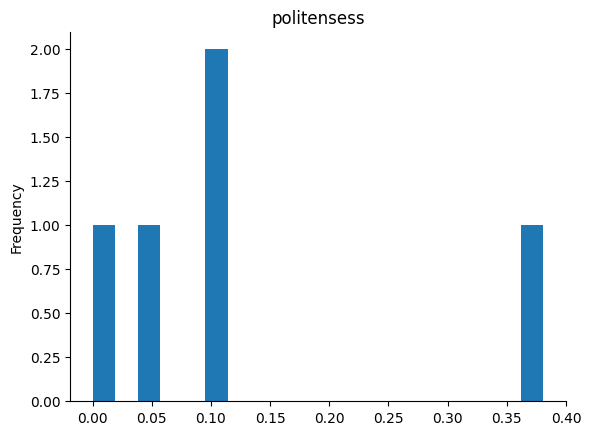

In [13]:
from matplotlib import pyplot as plt
_df_2['politensess'].plot(kind='hist', bins=20, title='politensess')
plt.gca().spines[['top', 'right',]].set_visible(False)

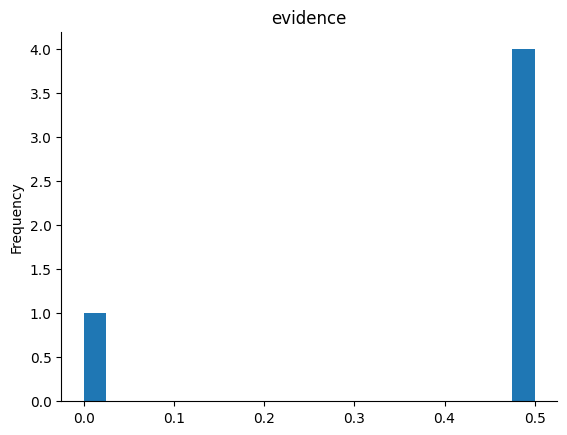

In [12]:
from matplotlib import pyplot as plt
_df_1['evidence'].plot(kind='hist', bins=20, title='evidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

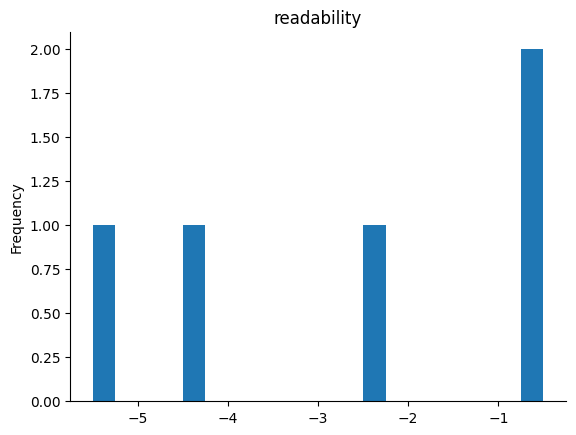

In [11]:
from matplotlib import pyplot as plt
_df_0['readability'].plot(kind='hist', bins=20, title='readability')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Example array
my_array = [-15, 5, -12, 8, -20, -8]

# Modify values less than -10 to be -10
readability_scores = [-10 if num < -10 else num for num in readability_scores]

readability_scores

[-0.5,
 -0.5,
 -4.5,
 -5.5,
 -2.5,
 0,
 -4.5,
 -4.5,
 0,
 -4.5,
 0,
 -0.5,
 0,
 -10,
 -1.5,
 0,
 0,
 0,
 -4.5,
 -1.5,
 0,
 0,
 0,
 0,
 -5.5,
 0,
 -10,
 -0.5,
 -0.5,
 -2.5,
 -4.5,
 -1.5,
 0,
 -2.5,
 -2.5,
 0,
 0,
 -3.5,
 -2.5,
 -4.5,
 -5.5,
 0,
 0,
 -0.5,
 0,
 0,
 -1.5,
 -0.5,
 -1.5,
 -3.5,
 0,
 0,
 -4.5,
 -1.5,
 -3.5,
 -3.5,
 -0.5,
 0,
 -3.5,
 -3.5,
 -1.5,
 -5.5,
 -2.5,
 -0.5,
 -0.5,
 -1.5,
 -0.5,
 0,
 -2.5,
 -4.5,
 0,
 0,
 0,
 0,
 0,
 -5.5,
 -1.5,
 -4.5,
 -2.5,
 -1.5,
 -1.5,
 -2.5,
 -5.5,
 -3.5,
 0,
 -4.5,
 -2.5,
 -5.5,
 -5.5,
 -5.5,
 -0.5,
 0,
 -0.5,
 -5.5,
 -5.5,
 -0.5,
 -0.5,
 -1.5,
 -5.5,
 -1.5,
 -5.5,
 0,
 -5.5,
 -0.5,
 0,
 -5.5,
 -5.5,
 -10,
 0,
 -0.5,
 -0.5,
 0,
 -0.5,
 -0.5,
 0,
 -4.5,
 -5.5,
 -1.5,
 -3.5,
 -0.5,
 -1.5,
 -2.5,
 0,
 -2.5,
 -0.5,
 -4.5,
 -0.5,
 0,
 0,
 0,
 -3.5,
 -5.5,
 -3.5,
 -2.5,
 -2.5,
 -2.5,
 -5.5,
 0,
 -3.5,
 -1.5,
 -3.5,
 -0.5,
 -0.5,
 -5.5,
 -4.5,
 -0.5,
 -0.5,
 -0.5,
 -4.5,
 -2.5,
 -0.5,
 0,
 -1.5,
 0,
 -0.5,
 -0.5,
 -0.5,
 -1.5,
 0,
 0,
 -0.5,
 -0.5,
 

In [ ]:
min(readability_scores)

-10

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Your actual array containing negative and zero values
x_array = np.array(readability_scores)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_array.reshape(-1, 1))
scaled_data

array([[ 0.75581077],
       [ 0.75581077],
       [-0.95917404],
       ...,
       [ 0.32706457],
       [ 0.97018388],
       [-1.38792024]])

this one

In [ ]:
from sklearn import preprocessing
import numpy as np

#x_array = np.array([-0.5, -0.5, -4.5, -5.5, -2.5, 0, -4.5, -4.5, 0, -4.5])
x_array = np.array(readability_scores)

scaler = preprocessing.MinMaxScaler()
# Reshape the array to have a shape of (n_samples, n_features)
x_array_reshaped = x_array.reshape(-1, 1)
d = scaler.fit_transform(x_array_reshaped)
print(d[:100])


[[0.95]
 [0.95]
 [0.55]
 [0.45]
 [0.75]
 [1.  ]
 [0.55]
 [0.55]
 [1.  ]
 [0.55]
 [1.  ]
 [0.95]
 [1.  ]
 [0.  ]
 [0.85]
 [1.  ]
 [1.  ]
 [1.  ]
 [0.55]
 [0.85]
 [1.  ]
 [1.  ]
 [1.  ]
 [1.  ]
 [0.45]
 [1.  ]
 [0.  ]
 [0.95]
 [0.95]
 [0.75]
 [0.55]
 [0.85]
 [1.  ]
 [0.75]
 [0.75]
 [1.  ]
 [1.  ]
 [0.65]
 [0.75]
 [0.55]
 [0.45]
 [1.  ]
 [1.  ]
 [0.95]
 [1.  ]
 [1.  ]
 [0.85]
 [0.95]
 [0.85]
 [0.65]
 [1.  ]
 [1.  ]
 [0.55]
 [0.85]
 [0.65]
 [0.65]
 [0.95]
 [1.  ]
 [0.65]
 [0.65]
 [0.85]
 [0.45]
 [0.75]
 [0.95]
 [0.95]
 [0.85]
 [0.95]
 [1.  ]
 [0.75]
 [0.55]
 [1.  ]
 [1.  ]
 [1.  ]
 [1.  ]
 [1.  ]
 [0.45]
 [0.85]
 [0.55]
 [0.75]
 [0.85]
 [0.85]
 [0.75]
 [0.45]
 [0.65]
 [1.  ]
 [0.55]
 [0.75]
 [0.45]
 [0.45]
 [0.45]
 [0.95]
 [1.  ]
 [0.95]
 [0.45]
 [0.45]
 [0.95]
 [0.95]
 [0.85]
 [0.45]
 [0.85]]


In [ ]:
np.min(readability_scores)

-10.0

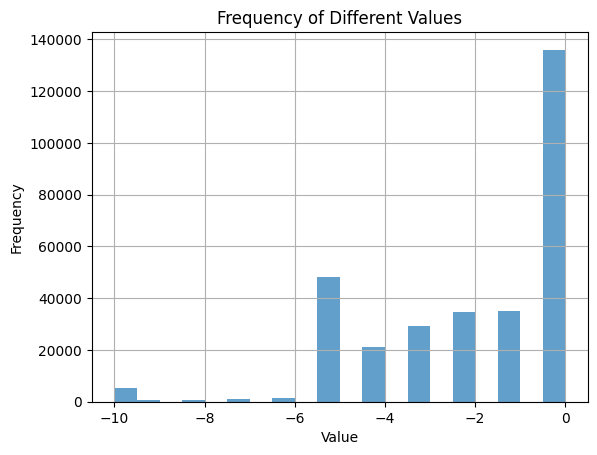

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Create a histogram
plt.hist(readability_scores, bins=20, alpha=0.7)
plt.title('Frequency of Different Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


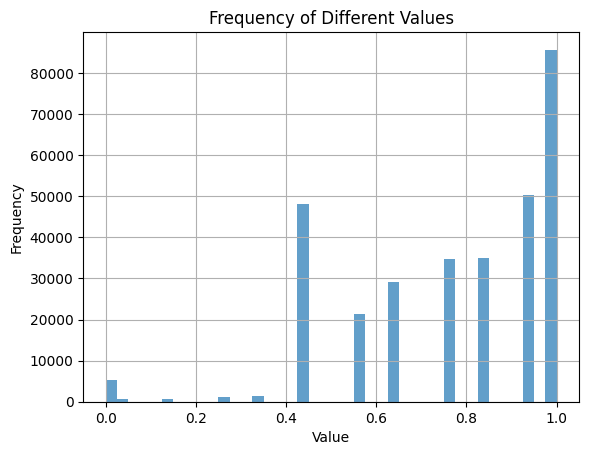

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Create a histogram
plt.hist(d, bins=40, alpha=0.7)
plt.title('Frequency of Different Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
from sklearn import preprocessing
import numpy as np

has_site_refs = [1 if num > 1 else num for num in has_site_refs]

#x_array = np.array([-0.5, -0.5, -4.5, -5.5, -2.5, 0, -4.5, -4.5, 0, -4.5])
x_array = np.array(has_site_refs)

scaler = preprocessing.MinMaxScaler()
# Reshape the array to have a shape of (n_samples, n_features)
x_array_reshaped = x_array.reshape(-1, 1)
has_site_refs_n = scaler.fit_transform(x_array_reshaped)
print(has_site_refs_n[:100])


[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


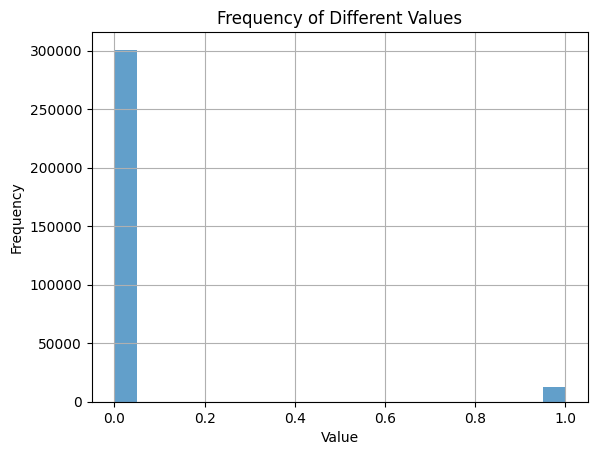

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Create a histogram
plt.hist(has_site_refs, bins=20, alpha=0.7)
plt.title('Frequency of Different Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()